# Попробуем три различных способа уменьшения числа цветов картинки.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import imageio

## 1. Оригинал 

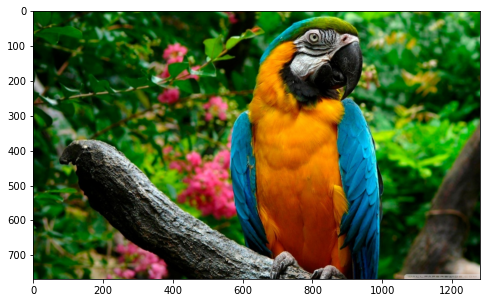

In [2]:

original = imageio.imread('p.jpg')

plt.figure(figsize=(8, 8))
plt.imshow(original)

## 2. Способ уменьшения цветов используя  KMeans.

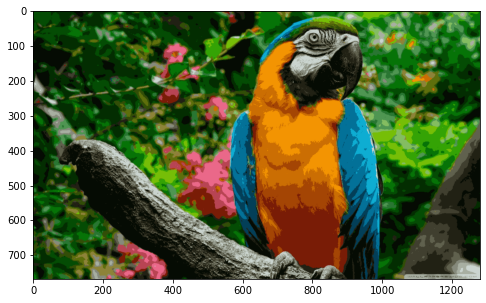

In [3]:
# Зададим количество цветов и произведем кластеризацию. 
# У каждого кластера будет свой цвет (цвет центра).

n_colors = 3*3*3

arr = original.reshape((-1, 3))
kmeans = KMeans(n_clusters=n_colors, random_state=42, algorithm='elkan').fit(arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
less_colors = centers[labels].reshape(original.shape).astype('uint8')

plt.figure(figsize=(8, 8))
plt.imshow(less_colors)

## 3. Квантизация тип 1.

In [4]:
# Уменьшим исходную градацию каждого цвета с 255 до нами заданного количества.
# В данном случае разделим все пространство каждого цвета на 3 части 
# и присвоим всем точкам попавшим в свой промежуток значение среднего этого промежутка.

n = 3
n_colors = n*n*n
original = imageio.imread('p.jpg')
arr = original.reshape((-1, 3))

borders = []
centers = []
borders.append(0)
for i in range(1,n):
    c = int(255/n*i-+int(255/2/n))
    centers.append(c)
    b = int(255/n*i)
    borders.append(b)

c = int(255/n*i)+int(255/2/n)
centers.append(c)
borders.append(255)

centers, borders

([43, 128, 212], [0, 85, 170, 255])

In [5]:
for i in range(arr.shape[0]):
    for j in range(arr.shape[1]):
        for k in range(1, len(borders)):
            if (arr[i][j] > borders[k-1]) and (arr[i][j] <= borders[k]):
                arr[i][j] = centers[k-1]                                            

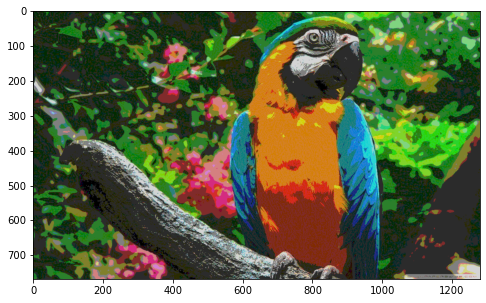

In [6]:
less_colors_2 = arr.reshape(original.shape).astype('uint8')

plt.figure(figsize=(8, 8))
plt.imshow(less_colors_2)

## 4. Квантизация тип 2.

In [7]:
# Уменьшим исходную градацию каждого цвета с 255 до нами заданного количества.
# В данном случае разделим все пространство каждого цвета на 3*3*3 составных миникубиков 
# и присвоим всем точкам попавшим в свой миникуб усредненное значение этого миникуба.

n = 3
n_colors = n*n*n
original = imageio.imread('p.jpg')
arr = original.reshape((-1, 3))

borders = []
centers = []
borders.append(0)
for i in range(1,n):
    c = int(255/n*i-+int(255/2/n))
    centers.append(c)
    b = int(255/n*i)
    borders.append(b)

c = int(255/n*i)+int(255/2/n)
centers.append(c)
borders.append(255)

centers, borders

([43, 128, 212], [0, 85, 170, 255])

In [8]:
mini_boxes = []

for i in range(1, len(borders)):
    for j in range(1, len(borders)):
        for k in range(1, len(borders)):
            current_box ={}
            current_box['red'] = [borders[i-1], borders[i]]
            current_box['green'] = [borders[j-1], borders[j]]  
            current_box['blue'] = [borders[k-1], borders[k]]            
            mini_boxes.append(current_box)
            

buckets = []
for n, current_box in enumerate(mini_boxes):   
    current_buk = []
    
    for i in range(len(arr)):


        if (arr[i, 0] > current_box['red'][0]) and (arr[i, 0] <= current_box['red'][1]):
            if (arr[i, 1] > current_box['green'][0]) and (arr[i, 1] <= current_box['green'][1]):
                if (arr[i, 2] > current_box['blue'][0]) and (arr[i, 2] <= current_box['blue'][1]):
                    current_buk.append(arr[i])
    buckets.append(current_buk)
    

In [9]:
bucket_colors = []
for n, bucket in enumerate(buckets):
    if len(bucket) > 0:
        a=np.array(bucket)
        point=a.mean(axis=0)
        point=point.astype(int)
    else:
        point=np.array([0, 0, 0])     
    bucket_colors.append(point)

In [10]:
for n, current_box in enumerate(mini_boxes):   
    current_buk = []
    
    for i in range(len(arr)):


        if (arr[i, 0] > current_box['red'][0]) and (arr[i, 0] <= current_box['red'][1]):
            if (arr[i, 1] > current_box['green'][0]) and (arr[i, 1] <= current_box['green'][1]):
                if (arr[i, 2] > current_box['blue'][0]) and (arr[i, 2] <= current_box['blue'][1]):
                    arr[i] = bucket_colors[n]   

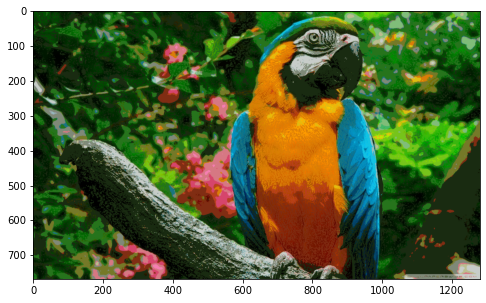

In [11]:
less_colors_3 = arr.reshape(original.shape).astype('uint8')

plt.figure(figsize=(8, 8))
plt.imshow(less_colors_3)